# Segment and Convert  signals, then compare cleaning methods for each modality
Segment : cut the different acquisitions recorded in the same file (multi-run recordings).

Convert : change the file type (from `.acq` to `.hdf5`).

Cleaning : preparing signals for processing and confounds for fmri.

#### Dependencies

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import neurokit2 as nk2
import neurokit as nk
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.set_style('darkgrid')
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 6.0)  
plt.rcParams.update({'font.size': 14})

Populating the interactive namespace from numpy and matplotlib


## Utils contains functions that lists and segments biosignal acquisitions by run

In [14]:
%run ./convert_segments.py

<Figure size 864x432 with 0 Axes>

# Parse signals according to Trigger channel
Make a list of files for a single subject and cut it

In [10]:
ls = list_sub("C:/Users/sangfrois/Desktop/NeuroMod_tests/", sub='sub-03')

In [11]:
ls

{'ses-005': ['last-rec1.acq']}

[(6946612, 7241350), (10378450, 10408505), (13545607, 13590069), (16727171, 16768603), (19905705, 19954727), (23091830, 23087068)]
sub-03_ses-005_Run01 in file  last-rec1.acq 
in experiment: ses-005 is parsed. 
and saved at C:/Users/sangfrois/Desktop/NeuroMod_tests/samples-data/ | sampling rate is : 5000.0 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-03_ses-005_Run02 in file  last-rec1.acq 
in experiment: ses-005 is parsed. 
and saved at C:/Users/sangfrois/Desktop/NeuroMod_tests/samples-data/ | sampling rate is : 5000.0 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-03_ses-005_Run03 in file  last-rec1.acq 
in experiment: ses-005 is parsed. 
and saved at C:/Users/sangfrois/Desktop/NeuroMod_tests/samples-data/ | sampling rate is : 5000.0 
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sub-03_ses-005_Run04 in file 

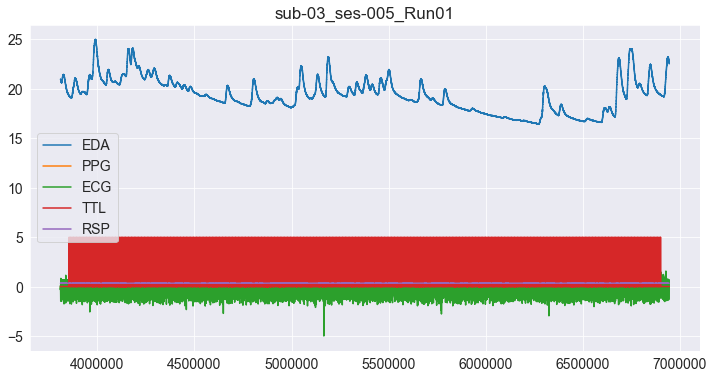

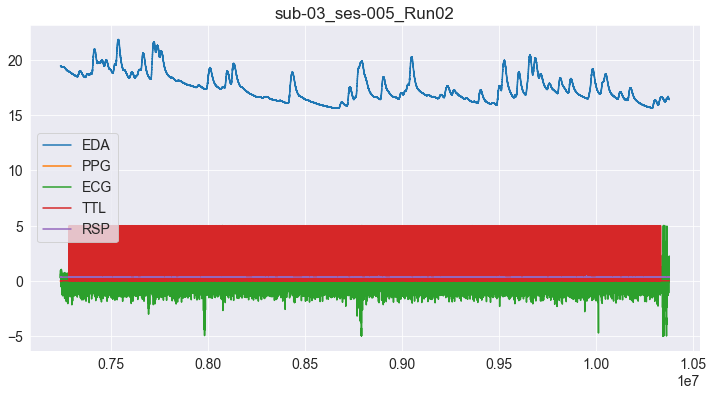

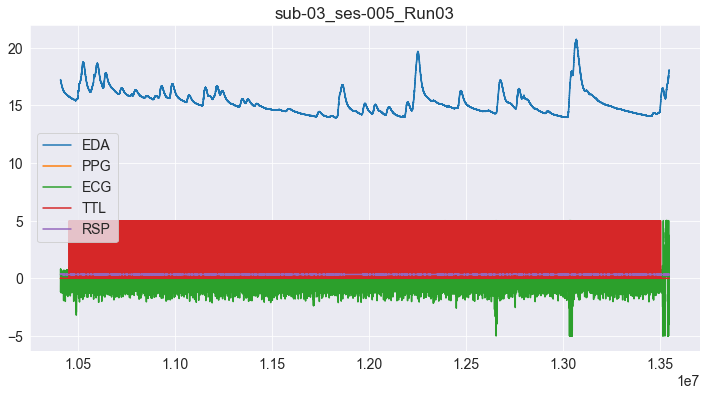

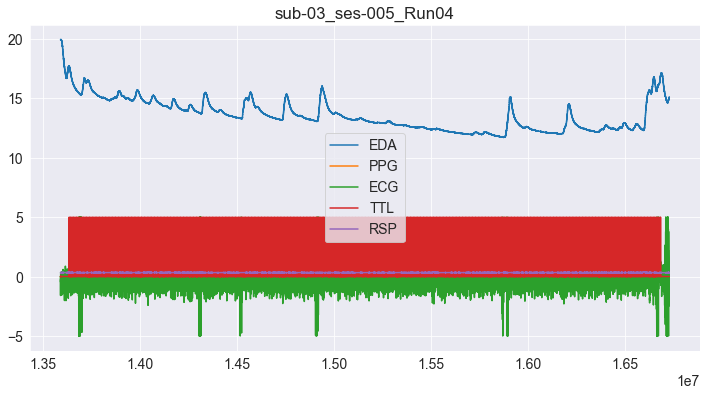

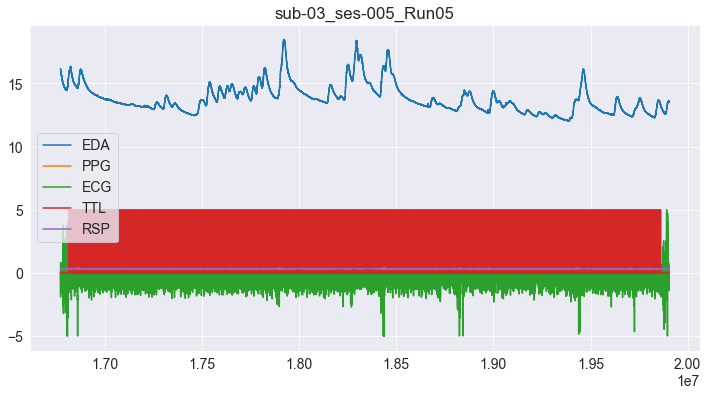

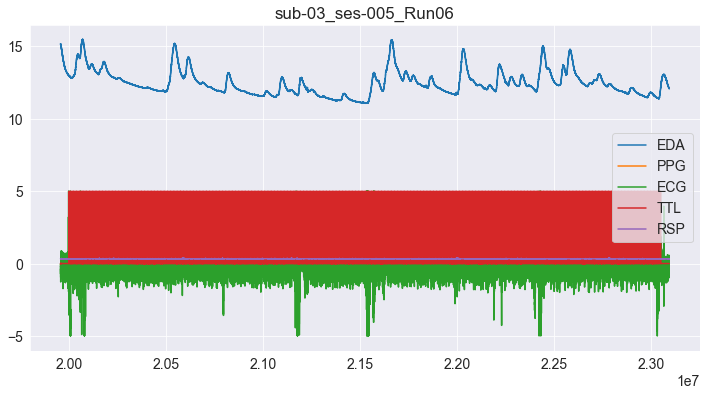

In [15]:
files = batch_parse("C:/Users/sangfrois/Desktop/NeuroMod_tests/", subject='sub-03', save_path="C:/Users/sangfrois/Desktop/NeuroMod_tests/samples-data/")

### Plot are saved along with the files
let's look at a run

In [4]:
bio_df = pd.read_csv('C:/Users/sangfrois/Desktop/NeuroMod_tests/samples-data/sub-03/sub-03_ses-005_Run01.tsv.gz', sep='t', compression='gzip')

column names are simpler and readable. They follow a convention... still to be made

In [5]:
bio_df.head()

,Unnamed: 0,EDA,PPG,ECG,TTL,RSP
0,3809508,20.954896,-0.042419,-0.301819,-0.000305,0.333862
1,3809509,20.954896,-0.042725,-0.300293,0.000000,0.332947
2,3809510,20.954896,-0.042419,-0.299377,-0.000305,0.334473
3,3809511,20.956421,-0.042114,-0.298309,-0.000305,0.334778
4,3809512,20.951844,-0.042419,-0.296936,0.000000,0.334778


## EDA

Text(0, 0.5, 'µSiemens')

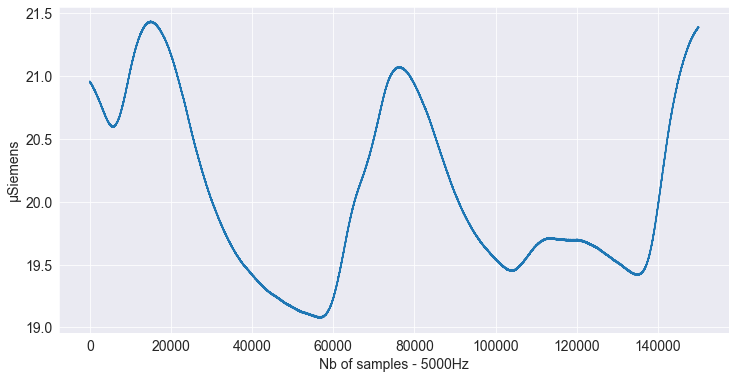

In [8]:
eda_raw = bio_df['EDA']
plt.plot(eda_raw[:150000])
plt.xlabel("Nb of samples - 5000Hz")
plt.ylabel("µSiemens")

## Cleaning method specs
Lowpass - 5Hz (normalized freq)

Butterworth

order 4

smoothing convolution with boxzen kernel and window size of 0.75 * sampling_rate

In [9]:
eda_clean = nk2.eda_clean(eda_raw, 5000, method='biosppy')

### Plot 30 seconds

Text(0, 0.5, 'µSiemens')

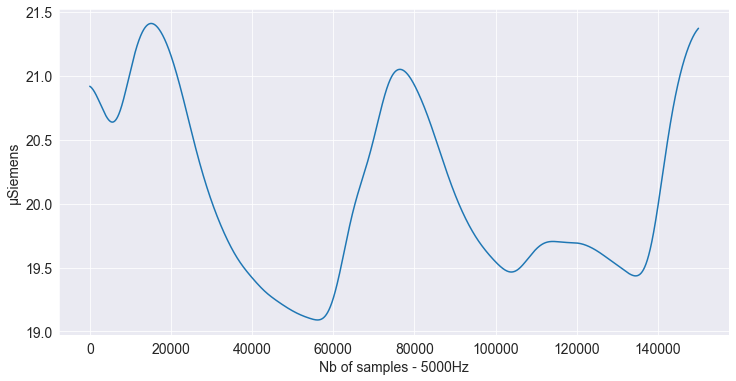

In [10]:
plt.plot(eda_clean[:150000])
plt.xlabel("Nb of samples - 5000Hz")
plt.ylabel("µSiemens")

### Downsample
from 5000 Hz to 250 Hz

In [11]:
eda_down = nk2.signal_resample(eda_clean, sampling_rate=5000, desired_sampling_rate=250, method='interpolation')

Text(0, 0.5, 'µSiemens')

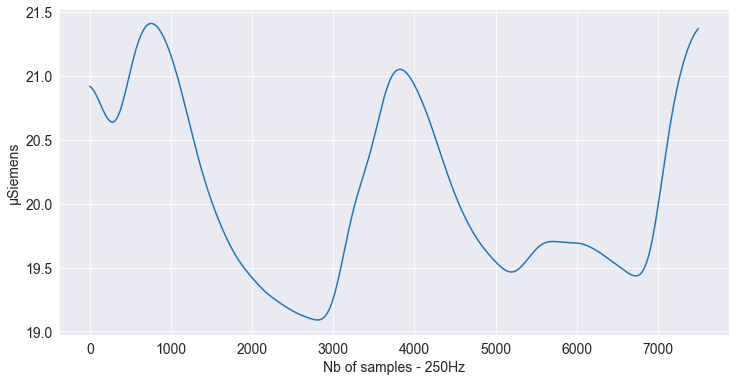

In [12]:
plt.plot(eda_down[:7500])
plt.xlabel("Nb of samples - 250Hz")
plt.ylabel("µSiemens")

### process with neurokit default pipeline

In [24]:
eda_proc, eda_info = nk2.eda_process(eda_raw, sampling_rate=5000)

Text(0, 0.5, 'µSiemens')

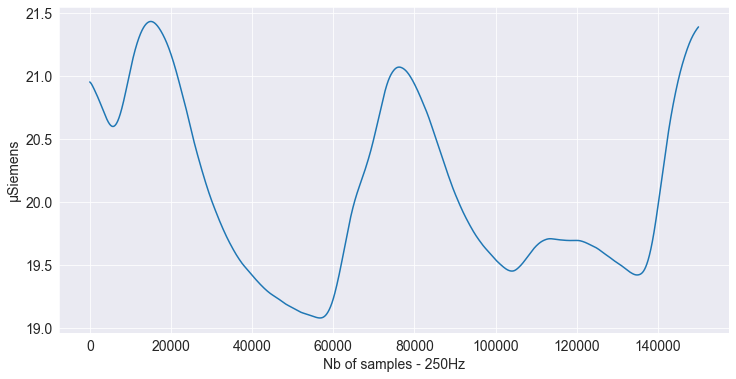

In [25]:
plt.plot(eda_proc['EDA_Clean'][:150000])
plt.xlabel("Nb of samples - 5000Hz")
plt.ylabel("µSiemens")

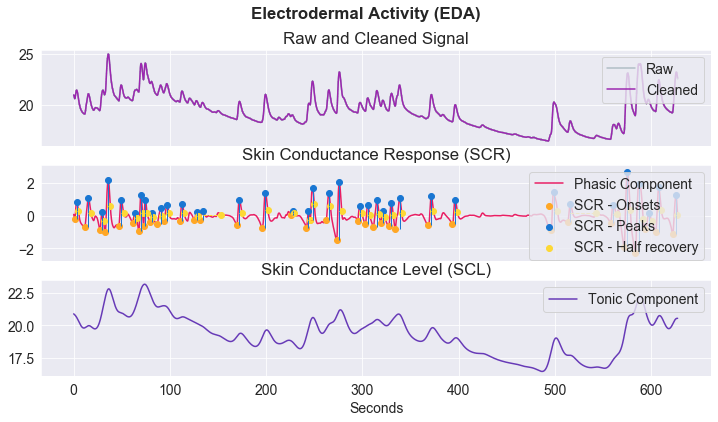

In [26]:
eda_fig = nk2.eda_plot(eda_proc, sampling_rate=5000)

In [22]:
eda_info.keys()

dict_keys(['SCR_Onsets', 'SCR_Peaks', 'SCR_Height', 'SCR_Amplitude', 'SCR_RiseTime', 'SCR_Recovery', 'SCR_RecoveryTime'])

# RSP

Text(0, 0.5, 'Volts')

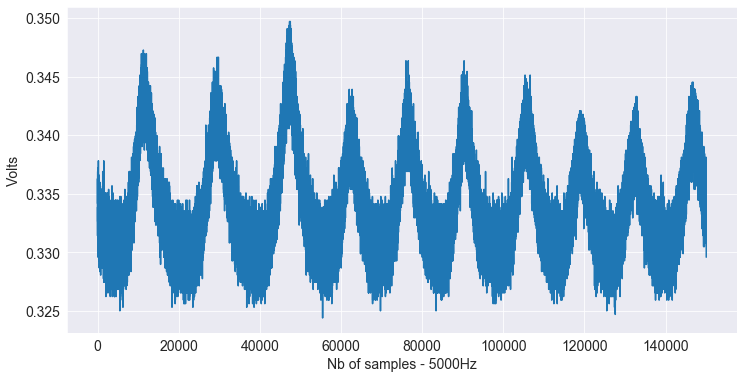

In [44]:
plt.plot(bio_df['RSP'][:150000])
plt.xlabel("Nb of samples - 5000Hz")
plt.ylabel("Volts")

In [27]:
rsp_clean = nk2.rsp_clean(bio_df['RSP'], sampling_rate=5000, method='khodadad2018')

Text(0, 0.5, 'Volts')

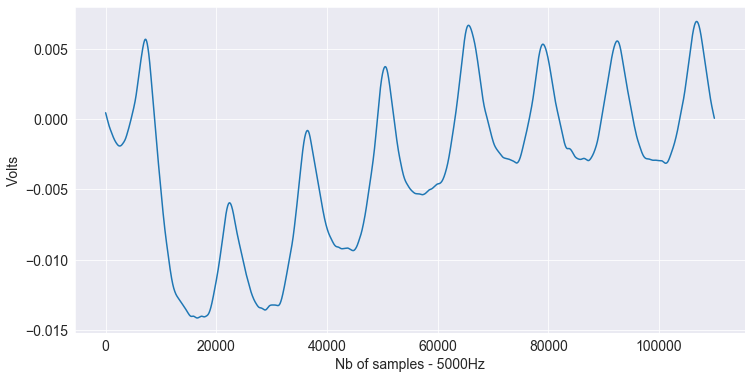

In [43]:
plt.plot(rsp_clean[40000:150000])
plt.xlabel("Nb of samples - 5000Hz")
plt.ylabel("Volts")

In [45]:
rsp_clean1 = nk2.rsp_clean(bio_df['RSP'], sampling_rate=5000, method='biosppy')

Text(0, 0.5, 'Volts')

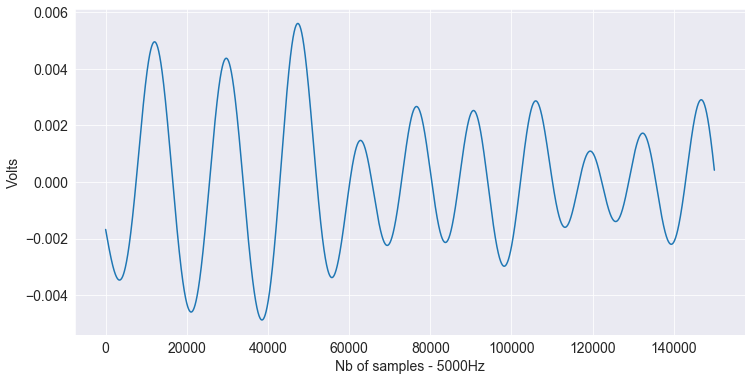

In [47]:
plt.plot(rsp_clean1[:150000])
plt.xlabel("Nb of samples - 5000Hz")
plt.ylabel("Volts")

# PPG

Text(0, 0.5, 'Volts')

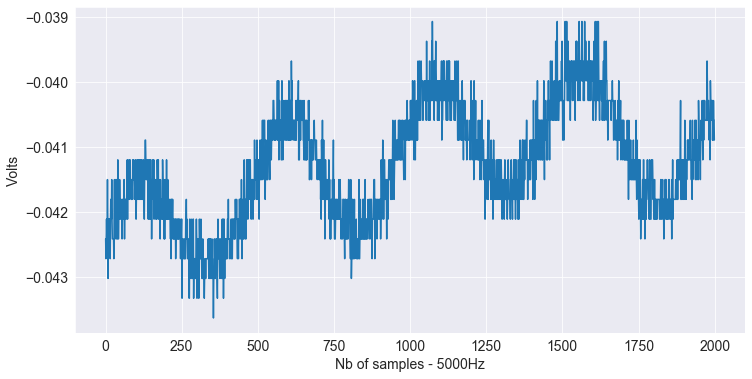

In [55]:
plt.plot(bio_df['PPG'][:50000])
plt.xlabel("Nb of samples - 5000Hz")
plt.ylabel("Volts")

In [63]:
ppg_clean = nk2.ppg_clean(bio_df['PPG'], sampling_rate=5000)

Text(0, 0.5, 'Volts')

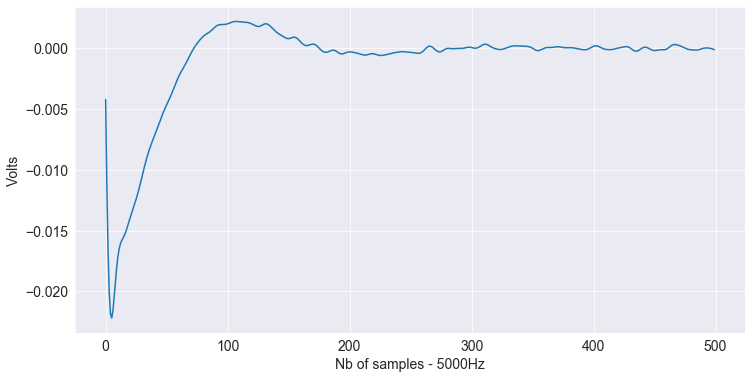

In [66]:
plt.plot(ppg_clean[:500])
plt.xlabel("Nb of samples - 5000Hz")
plt.ylabel("Volts")